# What is News?

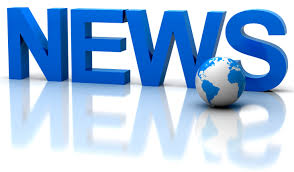

News is information about current events. This may be provided through many different media: word of mouth, printing, postal systems, broadcasting, electronic communication, or through the testimony of observers and witnesses to events.

Common topics for news reports include war, government, politics, education, health, the environment, economy, business, fashion, and entertainment, as well as athletic events, quirky or unusual events. Government proclamations, concerning royal ceremonies, laws, taxes, public health, and criminals, have been dubbed news since ancient times. Technological and social developments, often driven by government communication and espionage networks, have increased the speed with which news can spread, as well as influenced its content. The genre of news as we know it today is closely associated with the newspaper.

In the modern days, or as we know it, in the generation of computers, we have seen a mass shift from the hard copy mode to the online mode of News perceiving.

# What is a Fake News?

![](https://beconnected.esafety.gov.au/pluginfile.php/52815/mod_resource/content/12/fake-news-hero-img.jpg)

Fake news is false or misleading information presented as news. It often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. Media scholar Nolan Higdon has offered a more broad definition of fake news as "false or misleading content presented as news and communicated in formats spanning spoken, written, printed, electronic, and digital communication."

Once common in print, the prevalence of fake news has increased with the rise of social media, especially the Facebook News Feed. Political polarization, post-truth politics, confirmation bias, and social media algorithms have been implicated in the spread of fake news. It is sometimes generated and propagated by hostile foreign actors, particularly during elections. The use of anonymously-hosted fake news websites has made it difficult to prosecute sources of fake news for libel. In some definitions, fake news includes satirical articles misinterpreted as genuine, and articles that employ sensationalist or clickbait headlines that are not supported in the text.

![](https://media.newyorker.com/photos/5f19f57a698a316b79e7c413/16:9/w_2560,h_1440,c_limit/Glasser-TrumpWallaceInterview.jpg)

Fake news can reduce the impact of real news by competing with it; a Buzzfeed analysis found that the top fake news stories about the 2016 U.S. presidential election received more engagement on Facebook than top stories from major media outlets. It also has the potential to undermine trust in serious media coverage.The term has at times been used to cast doubt upon legitimate news, and U.S. president Donald Trump has been credited with popularizing the term by using it to describe any negative press coverage of himself. It has been increasingly criticized, due in part to Trump's misuse, with the British government deciding to avoid the term, as it is "poorly-defined" and "conflates a variety of false information, from genuine error through to foreign interference".

So now that we have an idea about the topic we are working, lets start with a cup of Coffee and a mind of Data

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdZOm7go4nEJ1Lf41vauRR9g43vAe6avzw_w&usqp=CAU)

# Importing the Libraries

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install gensim # Gensim is an open-source library for unsupervised topic modeling and natural language processing
import nltk
nltk.download('punkt')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading the Dataset

![](https://i.pinimg.com/originals/e0/2f/31/e02f319e566acc11cbff272c16a650e1.gif)

In [ ]:
df_true = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
df_fake = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")

**Setting up a target variable and combining both the real and fake news datasets**

In [ ]:
df_true['target'] = 1
df_fake['target'] = 0
df = pd.concat([df_true, df_fake]).reset_index(drop = True)
df['original'] = df['title'] + ' ' + df['text']
df.head()

**Lets take a note of the null values in the data**

In [ ]:
df.isnull().sum()

# Data Cleaning

In Text data, there often exists components which might not be of any help to us. 
The main target of this section will be to remove those components- such that we can have a smoother analysis. We plan to create a function here that will be responsible to remove any unneccesary words (Stopwords) from the data provided- and slall be using this function if and when required during our analysis and prediction
![](https://www.clorox.com/wp-content/uploads/2020/06/clx-hub-cleaning-sanitizing-730.png)

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

In [ ]:
# Transforming the unmatching subjects to the same notation
df.subject=df.subject.replace({'politics':'PoliticsNews','politicsNews':'PoliticsNews'})

# Exploratory Data Analysis
![](https://www.lifewire.com/thmb/Uxyvyhgut2ncmQ0-YpRcvXEgedA=/1467x1467/smart/filters:no_upscale()/best-search-engines-2483352-8cbda67ac96d4bc789f39e7ce61278d5.png)

# What is the distribution of Subjects between the True and Fake News? 

In [ ]:
sub_tf_df=df.groupby('target').apply(lambda x:x['title'].count()).reset_index(name='Counts')
sub_tf_df.target.replace({0:'False',1:'True'},inplace=True)
fig = px.bar(sub_tf_df, x="target", y="Counts",
             color='Counts', barmode='group',
             height=400)
fig.show()

**Observation** The dataset looks really balanced and hence working on this is pretty easy. Thus we need not work on to make this dataset more balanced, and can safely assume this is a balanced dataset

# Which Subjects have received the most News Coverage?

In [ ]:
sub_check=df.groupby('subject').apply(lambda x:x['title'].count()).reset_index(name='Counts')
fig=px.bar(sub_check,x='subject',y='Counts',color='Counts',title='Count of News Articles by Subject')
fig.show()

**Observations** Political News and World News hold the most domination counts in the data set that we have considered.

Lets put on our Machine Learning Hat now and work on the Prediction!

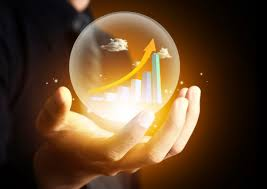

# Can the News Headline be enough to predict if the news if fake or not? Lets us see in the following analysis

In [ ]:
df['clean_title'] = df['title'].apply(preprocess)
df['clean_title'][0]

In [ ]:
df['clean_joined_title']=df['clean_title'].apply(lambda x:" ".join(x))

# Lets Take a look at the Word Clouds for the Titles

# Word Cloud using the Real News Headlines
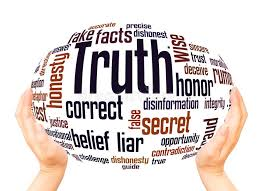

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 1].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

# Word Cloud using the Fake News Headlines
![](https://static2.bigstockphoto.com/0/0/2/large1500/200144554.jpg)

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 0].clean_joined_title))
plt.imshow(wc, interpolation = 'bilinear')

# Lets Look at the Count of Words Distribution in the Title

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSn62N7zy2MvbMKpPlA7aZtyoZniB6NAEcylw&usqp=CAU)

In [ ]:
maxlen = -1
for doc in df.clean_joined_title:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a title is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_title], nbins = 50)
fig.show()

**Observation:** On an average, The maximum number of titles range between 7-8 words. Would be a bit tricky to judge if the news if true or fake only with these few words. So we hope we shall not be getting a great amount of accuracy using the title alone. Still lets move on to our prediction

# Prediction- How much accurately can we predict if the News is True or Fake just from the Title?

![](https://s.wsj.net/public/resources/images/ON-CJ684_quizgr_B620_20171229134559.jpg)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_title, df.target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)

In [ ]:
model = LogisticRegression(C=2)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

**Observations** Damn! 94.75% accuarte prediction is quite a good result (Didn't expect it though :P). Now lets take a look at the confusion Matrix for this model using just the title

# The Confusion Matrix
![](https://images.sadhguru.org/sites/default/files/media_files/iso/en/48257-confusion-clarity-spiritual-path.jpg)

In [ ]:
cm = confusion_matrix(list(y_test), predicted_value)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='viridis')

**Observations** 4465 Fake News have been Classified as Fake, while 4045 Real News have been classified as Real! Well Done! But we see we still have 470 titles that are misleading and are classified wrong. 

Lets think in a different approach- maybe considering the content of the News to Predict if the News if True of Fake!

# Lets Check if the Content of the News is enough to predict if the news if fake or not? Lets us see in the following analysis

In [ ]:
df['clean_text'] = df['text'].apply(preprocess)
df['clean_joined_text']=df['clean_text'].apply(lambda x:" ".join(x))

# Lets Create the Word Clouds for the News Content Now!

# Word Cloud using the Real News Writeups

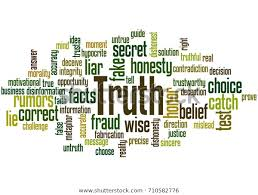

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 1].clean_joined_text))
plt.imshow(wc, interpolation = 'bilinear')

# Now Creating a Word Cloud using the Fake News Writeups
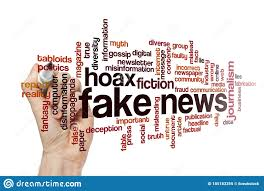

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(df[df.target == 0].clean_joined_text))
plt.imshow(wc, interpolation = 'bilinear')

# Lets try to identify the distribution of word counts in the texts

![](https://media.istockphoto.com/photos/isolated-black-african-hand-counting-on-fingers-picture-id1137908211)

In [ ]:
maxlen = -1
for doc in df.clean_joined_text:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in a News Content is =", maxlen)
fig = px.histogram(x = [len(nltk.word_tokenize(x)) for x in df.clean_joined_text], nbins = 50)
fig.show()

**Observation** As we can see most of the News articles are within a range of 100-200 words. Anything beyond this point is not very catchy, and even the mdia tends to avoid. But yes when the number of words are such large, it will be much easier for the model to predict. We hope the newer accuracy is much more than the Title model. Lets check it out in our next section

# Lets Predict!!!

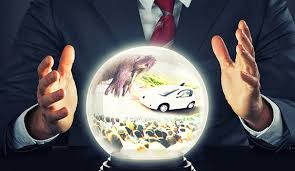

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_text, df.target, test_size = 0.2,random_state=2)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)
model = LogisticRegression(C=2.5)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

**Observation** WoooW! 99.53% That's quite an improvement. Much better than predicting from the titles. Indeed its rightly said, never judge a book by its cover, nor a news by its title. Having such a great accuracy lets for once take a look into the Confusion Matrix

# The Confusion Matrix
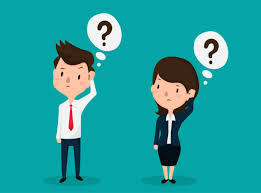

In [ ]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g')

**Observation** This is Awesome! 4662 Contents of Fake News were classified as Fake, while 4281 Real ones were rightly predicted as well. Now we have only 41 missclassified sets. Massive improvement from our first model. But can we try to improve this any further?
What if, we combine the title and content, would it give us any better result- No harm in trying. Lets check that out in the following section

# Lets try to analyze, how accurately can we predict if we consider the entire news- Title and Content!!!

In [ ]:
df['clean_final'] = df['original'].apply(preprocess)
df['clean_joined_final']=df['clean_final'].apply(lambda x:" ".join(x))

# Lets directly skip into the Predictions!
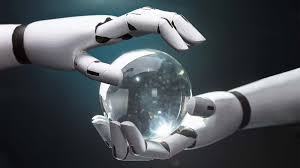

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.clean_joined_final, df.target, test_size = 0.2,random_state=0)
vec_train = CountVectorizer().fit(X_train)
X_vec_train = vec_train.transform(X_train)
X_vec_test = vec_train.transform(X_test)
model = LogisticRegression(C=3)
model.fit(X_vec_train, y_train)
predicted_value = model.predict(X_vec_test)
accuracy_value = roc_auc_score(y_test, predicted_value)
print(accuracy_value)

**Observation** 99.67%!!! Quite Perfect Score! So considering both the title and the content of the news we have been able to predict the nature of the news! For our final consolation, lets take a look at the confusion matrix!

# Confusion Matrix

![](https://miro.medium.com/max/1986/1*OlmJDZhDoetQBpXs52d_Bw.jpeg)

In [ ]:
prediction = []
for i in range(len(predicted_value)):
    if predicted_value[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True,fmt='g',cmap='inferno')

**Observation** Awesome!!!! Now we are ready with our target of news Classification!
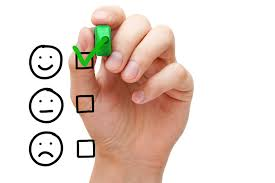

# Conclusion

![](https://www.zerys.com/hubfs/shutterstock_138382064_edited.jpg)

We have been succesfully able to reach the target for classifying a News- and are able to identify if this is a True or Fake. However would like to highligh ton a few points as mentioned below:
1. Its not much feasible to predict the news just from its title. **"Titles are misleading!!"**
2. A much better Idea was obtained when we considered the article context for the News. The accuracy percentages shot up from 94% to 99+%. Drastic Improvement it is!
3. Considering both the title and the context, we have been able to reach the highest percentages of accuracy. I shall be working on to implement further models that would give even better results.

Regarding the data, would like to add on a few points:
1. The Data obtained was clean, hence didn't require to go for much data cleaning. Have made certain modifications as per my own requirement.
2. A higher volume input would be better for the model to train- will be thinking on those lines and trying to improve this further

# Kindly upvote if you liked this analysis and Prediction!!!

![](https://media2.giphy.com/media/xUPOqo6E1XvWXwlCyQ/giphy.gif)